In [30]:
import pandas
import glob
import numpy as np
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline

# Load all Sharpr data

In [101]:
from collections import OrderedDict

dataMatrix = open('../data/processed_data/sharprFullDataMatrix.tsv')
header = dataMatrix.readline()
header = header.strip().split('\t')
cols_to_indices = {col: header.index(col) for col in header}
# print cols_to_indices
print header

rep1Names = ['k562_minp_rep1_count', 'k562_sv40p_rep1_count',
             'hepg2_minp_rep1_count', 'hepg2_sv40p_rep1_count',
             'k562_minp_rep1_norm', 'k562_sv40p_rep1_norm',
             'hepg2_minp_rep1_norm', 'hepg2_sv40p_rep1_norm'
            ]
rep2Names = ['k562_minp_rep2_count', 'k562_sv40p_rep2_count',
             'hepg2_minp_rep2_count', 'hepg2_sv40p_rep2_count',
             'k562_minp_rep2_norm', 'k562_sv40p_rep2_norm',
             'hepg2_minp_rep2_norm', 'hepg2_sv40p_rep2_norm'
            ]
avgNames = ['k562_minp_avg_count', 'k562_sv40p_avg_count',
             'hepg2_minp_avg_count', 'hepg2_sv40p_avg_count',
             'k562_minp_avg_norm', 'k562_sv40p_avg_norm',
             'hepg2_minp_avg_norm', 'hepg2_sv40p_avg_norm'
            ]
expNames = ['k562_minp_count', 'k562_sv40p_count',
            'hepg2_minp_count', 'hepg2_sv40p_count',
            'k562_minp_norm', 'k562_sv40p_norm',
            'hepg2_minp_norm', 'hepg2_sv40p_norm'
            ]
dnaNames = ['minp', 'sv40p']
names = []
# rnaRep1, rnaRep2, rnaAvg, dna = [OrderedDict() for i in range(4)]
rnaRep1 = OrderedDict([(exp, []) for exp in expNames])
rnaRep2 = OrderedDict([(exp, []) for exp in expNames])
rnaAvg = OrderedDict([(exp, []) for exp in expNames])
dna = OrderedDict([(exp, []) for exp in dnaNames])
j = 0
for line in dataMatrix:
    line = line.strip().split('\t')
#     if j < 1:
#         print line
#         j += 1
#     else:
#         break
    names.append(line[cols_to_indices['name']])
    for data_dict in [rnaRep1, rnaRep2, rnaAvg, dna]:
        for (i, measurement) in enumerate(data_dict.keys()):
            if data_dict is rnaRep1:
                measurement_rep = rep1Names[i]
            if data_dict is rnaRep2:
                measurement_rep = rep2Names[i]
            if data_dict is rnaAvg:
                measurement_rep = avgNames[i]
            if data_dict is dna:
                if measurement == 'minp':
                    measurement_rep = 'dna_minp_count'
                else:
                    measurement_rep = 'dna_sv40p_count'
#             if measurement == "k562_minp_norm":
#                 print measurement_rep
#                 print cols_to_indices[measurement_rep]
            data_dict[measurement].append(float(line[cols_to_indices[measurement_rep]]))

['name', 'chrom', 'center_coord', 'sequence', 'barcode', 'chromatin_state', 'design', 'k562_minp_rep1_count', 'k562_minp_rep2_count', 'k562_minp_avg_count', 'k562_sv40p_rep1_count', 'k562_sv40p_rep2_count', 'k562_sv40p_avg_count', 'hepg2_minp_rep1_count', 'hepg2_minp_rep2_count', 'hepg2_minp_avg_count', 'hepg2_sv40p_rep1_count', 'hepg2_sv40p_rep2_count', 'hepg2_sv40p_avg_count', 'k562_minp_rep1_norm', 'k562_minp_rep2_norm', 'k562_minp_avg_norm', 'k562_sv40p_rep1_norm', 'k562_sv40p_rep2_norm', 'k562_sv40p_avg_norm', 'hepg2_minp_rep1_norm', 'hepg2_minp_rep2_norm', 'hepg2_minp_avg_norm', 'hepg2_sv40p_rep1_norm', 'hepg2_sv40p_rep2_norm', 'hepg2_sv40p_avg_norm', 'dna_minp_count', 'dna_sv40p_count']


In [102]:
rnaRep1 = OrderedDict([(measurement, np.array(rnaRep1[measurement])) for measurement in rnaRep1.keys()])
rnaRep2 = OrderedDict([(measurement, np.array(rnaRep2[measurement])) for measurement in rnaRep2.keys()])
rnaAvg = OrderedDict([(measurement, np.array(rnaAvg[measurement])) for measurement in rnaAvg.keys()])
dna = OrderedDict([(measurement, np.array(dna[measurement])) for measurement in dna.keys()])

print type(dna['minp'])

<type 'numpy.ndarray'>


# Plot RNA count & normalized signal replicate correlations

In [113]:
def curate_rna(rna, dna, min_plasmids = 20):
    fragments_above_min = dna > min_plasmids
    return rna[fragments_above_min]

def curate_dna(dna, min_plasmids = 20):
    return dna[dna > min_plasmids]

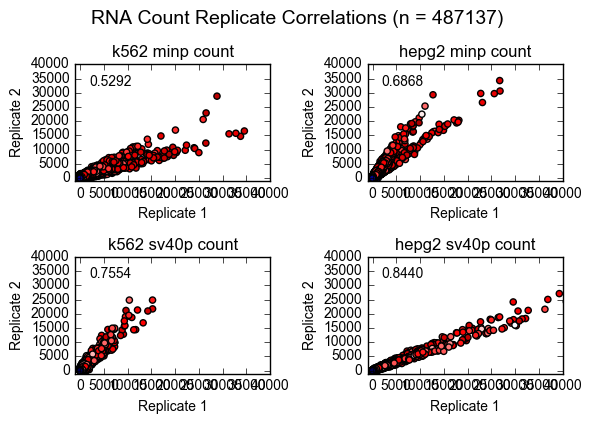

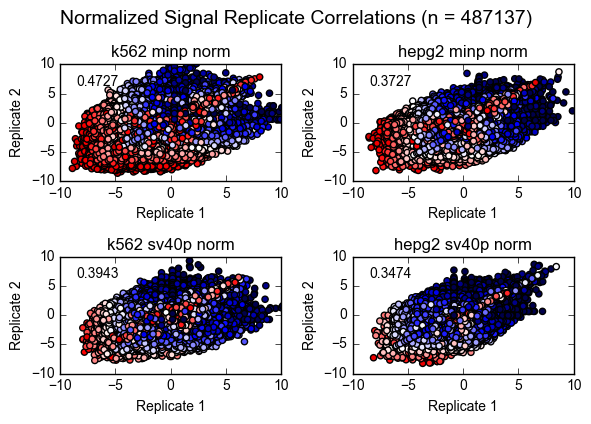

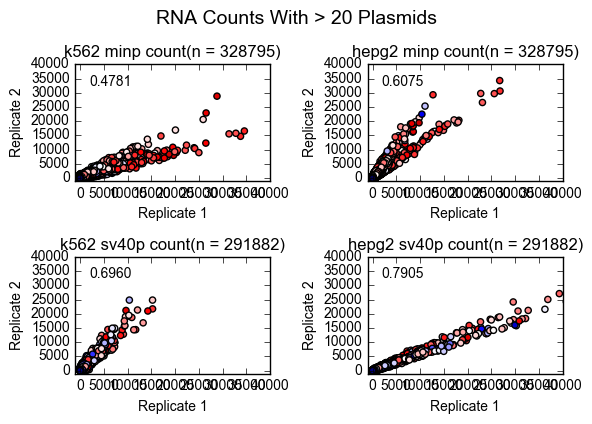

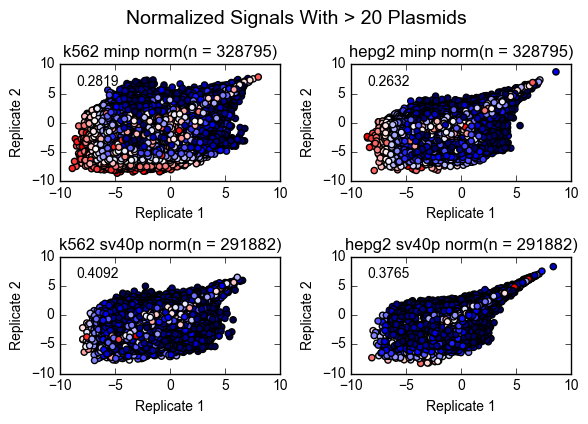

In [116]:
f, ax = plt.subplots(2, 2)
for (i, exp) in enumerate(expNames[:4]):
    promoter = exp.split('_')[1]
    ax[i%2, i/2].set_title(' '.join(exp.split('_')))
    ax[i%2, i/2].scatter(rnaRep1[exp],
                         rnaRep2[exp],
                         c = np.log2(dna[promoter] + 1),
                         cmap = 'seismic')
    spear = stats.spearmanr(rnaRep1[exp],
                            rnaRep2[exp])[0]
    ax[i%2, i/2].set_xlabel('Replicate 1')
    ax[i%2, i/2].set_ylabel('Replicate 2')
    ax[i%2, i/2].set_xlim([-1000, 40000])
    ax[i%2, i/2].set_ylim([-1000, 40000])
    ax[i%2, i/2].text(0.18, 0.85, '%.4f' % spear,
                      ha='center', va='center',
                      transform=ax[i%2, i/2].transAxes)

f.suptitle("RNA Count Replicate Correlations (n = %d)" % len(rnaRep1[exp]), y = 1.04, fontsize=14)
    
plt.gcf().subplots_adjust(top=0.25)
plt.tight_layout()
plt.savefig('../plots/rnaCountsReplicates.png')
plt.show()

f, ax = plt.subplots(2, 2)
for (i, exp) in enumerate(expNames[4:]):
    promoter = exp.split('_')[1]
    ax[i%2, i/2].set_title(' '.join(exp.split('_')))
    ax[i%2, i/2].scatter(rnaRep1[exp],
                         rnaRep2[exp],
                         c = np.log2(dna[promoter] + 1),
                         cmap = 'seismic')
    spear = stats.spearmanr(rnaRep1[exp],
                            rnaRep2[exp])[0]
    ax[i%2, i/2].set_xlabel('Replicate 1')
    ax[i%2, i/2].set_ylabel('Replicate 2')
    ax[i%2, i/2].set_xlim([-10, 10])
    ax[i%2, i/2].set_ylim([-10, 10])
    ax[i%2, i/2].text(0.17, 0.85, '%.4f' % spear,
                      ha='center', va='center',
                      transform=ax[i%2, i/2].transAxes)

f.suptitle("Normalized Signal Replicate Correlations (n = %d)" % len(rnaRep1[exp]), y = 1.04, fontsize=14)
    
plt.gcf().subplots_adjust(top=0.25)
plt.tight_layout()
plt.savefig('../plots/normSignalsReplicates.png')
plt.show()

f, ax = plt.subplots(2, 2)
min_plasmids = 20

for (i, exp) in enumerate(expNames[:4]):
    promoter = exp.split('_')[1]
    rna1 = curate_rna(rnaRep1[exp], dna[promoter], min_plasmids)
#     print "Number of datapoints with > %d plasmids = %d" % (min_plasmids, len(rna1))
    rna2 = curate_rna(rnaRep2[exp], dna[promoter], min_plasmids)
    ax[i%2, i/2].set_title(' '.join(exp.split('_')) + " (n = " + str(len(rna1)) + ")")
    ax[i%2, i/2].scatter(rna1,
                         rna2,
                         c = np.log2(curate_dna(dna[promoter], min_plasmids)),
                         cmap = 'seismic'
                         )
    spear = stats.spearmanr(rna1,
                            rna2)[0]
    ax[i%2, i/2].set_xlabel('Replicate 1')
    ax[i%2, i/2].set_ylabel('Replicate 2')
    ax[i%2, i/2].set_xlim([-1000, 40000])
    ax[i%2, i/2].set_ylim([-1000, 40000])
    ax[i%2, i/2].text(0.18, 0.85, '%.4f' % spear,
                      ha='center', va='center',
                      transform=ax[i%2, i/2].transAxes)

f.suptitle("RNA Counts With > %d Plasmids" % (min_plasmids), y = 1.04, fontsize=14)
    
plt.gcf().subplots_adjust(top=0.25)
plt.tight_layout()
plt.savefig('../plots/rnaCountsWith%dPlasmids.png' % min_plasmids)
plt.show()

f, ax = plt.subplots(2, 2)
min_plasmids = 20

for (i, exp) in enumerate(expNames[4:]):
    promoter = exp.split('_')[1]
    rna1 = curate_rna(rnaRep1[exp], dna[promoter], min_plasmids)
#     print "Number of datapoints with > %d plasmids = %d" % (min_plasmids, len(rna1))
    rna2 = curate_rna(rnaRep2[exp], dna[promoter], min_plasmids)
    ax[i%2, i/2].set_title(' '.join(exp.split('_')) + " (n = " + str(len(rna1)) + ")")
    ax[i%2, i/2].scatter(rna1,
                         rna2,
                         c = np.log2(curate_dna(dna[promoter], min_plasmids)),
                         cmap = 'seismic'
                         )
    spear = stats.spearmanr(rna1,
                            rna2)[0]
    ax[i%2, i/2].set_xlabel('Replicate 1')
    ax[i%2, i/2].set_ylabel('Replicate 2')
    ax[i%2, i/2].set_xlim([-10, 10])
    ax[i%2, i/2].set_ylim([-10, 10])
    ax[i%2, i/2].text(0.17, 0.85, '%.4f' % spear,
                      ha='center', va='center',
                      transform=ax[i%2, i/2].transAxes)

f.suptitle("Normalized Signals With > %d Plasmids" % (min_plasmids), y = 1.04, fontsize=14)
    
plt.gcf().subplots_adjust(top=0.25)
plt.tight_layout()
plt.savefig('../plots/normSignalsWith%dPlasmids.png' % min_plasmids)
plt.show()

# Plot Spearman correlations vs. plasmid threshold

In [ ]:
import itertools
from scipy.stats import spearmanr

percentiles = np.arange(0, 100, 1)
thresholds = np.ndarray(shape = (len(percentiles)))
numFragmentsByThreshold = np.ndarray(shape = (len(percentiles)))
corrs = np.ndarray(shape = (len(percentiles), 4))

for (i, percentile) in enumerate(percentiles):
    for (j, promoter) in enumerate(['minp', 'sv40p']):
        plasmid_threshold = np.percentile(dna[promoter], percentile, interpolation = 'lower')
#         print("Plasmid threshold = %d" % plasmid_threshold)
        thresholds[i] = plasmid_threshold
        for (k, ct) in enumerate(['k562', 'hepg2']): 
            exp = '_'.join([ct, promoter, 'norm'])
            rna1 = curate_rna(rnaRep1[exp], dna[promoter], plasmid_threshold)
            rna2 = curate_rna(rnaRep2[exp], dna[promoter], plasmid_threshold)
            numFragmentsByThreshold[i] = len(rna1)
            corrs[i][k*2 + j] = spearmanr(rna1, rna2)[0]

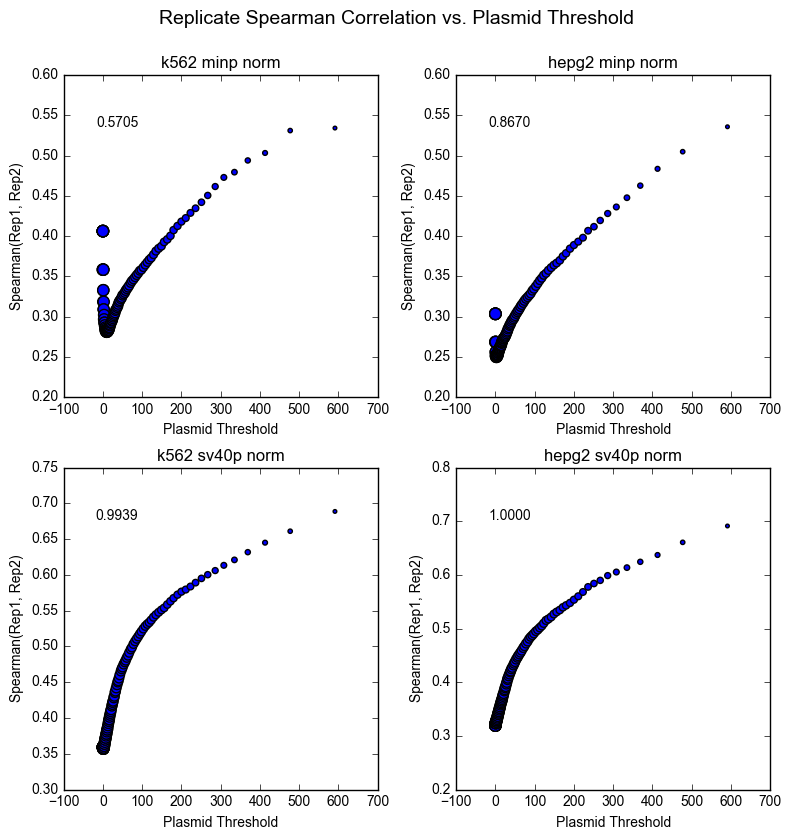

In [163]:
f, ax = plt.subplots(2, 2, figsize=(8,8))

for (i, (ct, p)) in enumerate(itertools.product(['k562', 'hepg2'], ['minp', 'sv40p'])):
    ax[i%2, i/2].set_title(' '.join([ct, p, 'norm']))
    ax[i%2, i/2].scatter(thresholds,
                         corrs[:, i],
                         s = (numFragmentsByThreshold + 1)**0.5 / 10
                         )
    spear = spearmanr(thresholds,
                      corrs[:, i])[0]
    ax[i%2, i/2].set_xlabel('Plasmid Threshold')
    ax[i%2, i/2].set_ylabel('Spearman(Rep1, Rep2)')
#     ax[i%2, i/2].set_xlim([-10, 10])
#     ax[i%2, i/2].set_ylim([-10, 10])
    ax[i%2, i/2].text(0.17, 0.85, '%.4f' % spear,
                      ha='center', va='center',
                      transform=ax[i%2, i/2].transAxes)

f.suptitle("Replicate Spearman Correlation vs. Plasmid Threshold", y = 1.04, fontsize=14)
f.subplots_adjust(hspace=0.5)
f.subplots_adjust(wspace=0.5)

# plt.gcf().subplots_adjust(top=0.25)
plt.tight_layout()
plt.savefig('../plots/replicateCorrVsPlasmids.png')
plt.show()

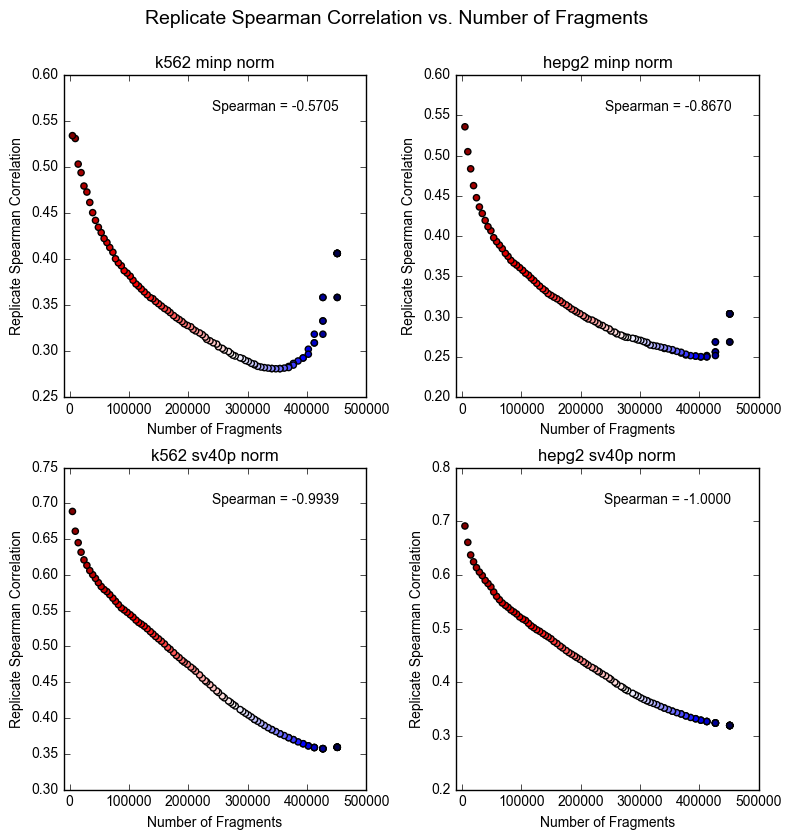

In [150]:
f, ax = plt.subplots(2, 2, figsize = (8, 8))

for (i, (ct, p)) in enumerate(itertools.product(['k562', 'hepg2'], ['minp', 'sv40p'])):
    ax[i%2, i/2].set_title(' '.join([ct, p, 'norm']))
    ax[i%2, i/2].scatter(numFragmentsByThreshold,
                         corrs[:, i],
                         c = np.log2(thresholds + 1),
                         cmap = 'seismic'
                         )
    spear = spearmanr(numFragmentsByThreshold,
                      corrs[:, i])[0]
    ax[i%2, i/2].set_xlabel('Number of Fragments')
    ax[i%2, i/2].set_ylabel('Replicate Spearman Correlation')
    ax[i%2, i/2].set_xlim([-10000, None])
#     ax[i%2, i/2].set_ylim([-10, 10])
    ax[i%2, i/2].text(0.7, 0.9, 'Spearman = %.4f' % spear,
                      ha='center', va='center',
                      transform=ax[i%2, i/2].transAxes)
#     plt.ticklabel_format(style='sci', axis='x')

f.suptitle("Replicate Spearman Correlation vs. Number of Fragments", y = 1.04, fontsize=14)
f.subplots_adjust(hspace=0.5)
f.subplots_adjust(wspace=0.5)

# plt.gcf().subplots_adjust(top=0.25)
plt.tight_layout()
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.savefig('../plots/replicateCorrVsNumFragments.png')
plt.show()